# Requirements

In [2]:
import time

from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
from selenium.webdriver.support.wait import WebDriverWait

# Configuration

In [3]:
options = webdriver.EdgeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [4]:
# Initialize the webdriver.
browser = webdriver.Edge(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://www.scrapethissite.com/pages/forms/. The task includes the extraction of **hockey team names** and their **wins** and **losses** in the respective **year** for a minimum of 25 hockey teams. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of wins and losses in the year 1990.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [10]:
url="https://www.scrapethissite.com/pages/forms"
browser.get(url)
names=[]
wins=[]
losses=[]
years=[]
for element in browser.find_elements(By.CLASS_NAME,'team'):
    name=element.find_element(By.CLASS_NAME,'name').text
    win=element.find_element(By.CLASS_NAME,'wins').text
    loss=element.find_element(By.CLASS_NAME,'losses').text
    year=element.find_element(By.CLASS_NAME,'year').text
    names.append(name)
    wins.append((int)(win))
    losses.append((int)(loss))
    years.append((int)(year))
    


In [11]:
print(len(wins))# Add as many code boxes as you need.
print(len(names))# Add as many code boxes as you need.
print(len(years))# Add as many code boxes as you need.
print(len(losses))# Add as many code boxes as you need.

25
25
25
25


In [12]:
data={
    "Name":names,
    "Wins":wins,
    "Losses":losses,
    "Years":years
}
df = pd.DataFrame(data)
print(df)

                     Name  Wins  Losses  Years
0           Boston Bruins    44      24   1990
1          Buffalo Sabres    31      30   1990
2          Calgary Flames    46      26   1990
3      Chicago Blackhawks    49      23   1990
4       Detroit Red Wings    34      38   1990
5         Edmonton Oilers    37      37   1990
6        Hartford Whalers    31      38   1990
7       Los Angeles Kings    46      24   1990
8   Minnesota North Stars    27      39   1990
9      Montreal Canadiens    39      30   1990
10      New Jersey Devils    32      33   1990
11     New York Islanders    25      45   1990
12       New York Rangers    36      31   1990
13    Philadelphia Flyers    33      37   1990
14    Pittsburgh Penguins    41      33   1990
15       Quebec Nordiques    16      50   1990
16        St. Louis Blues    47      22   1990
17    Toronto Maple Leafs    23      46   1990
18      Vancouver Canucks    28      43   1990
19    Washington Capitals    37      36   1990
20          W

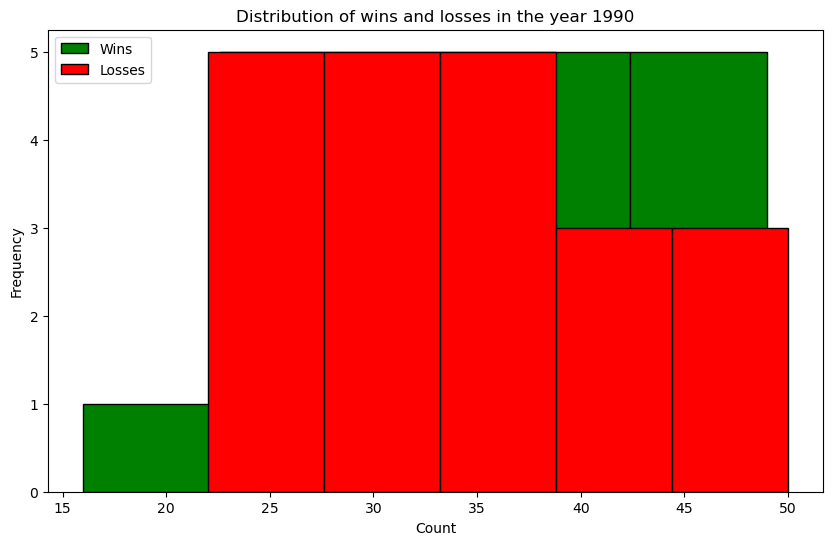

In [29]:
df_1990=df[df['Years']==1990]
plt.figure(figsize=(10, 6))
plt.hist(df_1990['Wins'],bins=5,edgecolor='black',color='green',label='Wins')
plt.hist(df_1990['Losses'],bins=5,edgecolor='black',color='red',label='Losses')
plt.title("Distribution of wins and losses in the year 1990")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Laboratory Exercise - Bonus Task (+ 2 points)

In the context of scraping the website https://www.scrapethissite.com/pages/forms/, the additional task involves searching for the hockey team 'Boston Bruins' using the available search field. You will extract the wins and losses data for this team covering the years from 1990 to 2011. After gathering this information, your task is to create a line plot where the wins and losses of the 'Boston Bruins' team are visualized across the years, displaying both trends on the same plot.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

## Solution

In [45]:
import time
# Write your code here.
browser.get("https://www.scrapethissite.com/pages/forms/")
search_field=browser.find_element(By.ID,'q')
search_field.send_keys("Boston")
search_button=browser.find_element(By.CSS_SELECTOR,'input.btn.btn-primary')
search_button.click()
boston_wins=[]
boston_losses=[]
boston_years=[]

elements=browser.find_elements(By.CLASS_NAME,'team')
for element in elements:
    win=element.find_element(By.CLASS_NAME,'wins').text
    loss=element.find_element(By.CLASS_NAME,'losses').text
    boston_year= int(element.find_element(By.CLASS_NAME, 'year').text)
    if 1990 <= boston_year <= 2011:
        boston_wins.append(int(win))
        boston_losses.append(int(loss))
        boston_years.append(boston_year)
    


In [47]:
dataBoston={
    "Wins":boston_wins,
    "Losses":boston_losses,
    "Years":boston_years
}

df=pd.DataFrame(dataBoston)
print(df)

    Wins  Losses  Years
0     44      24   1990
1     36      32   1991
2     51      26   1992
3     42      29   1993
4     27      18   1994
5     40      31   1995
6     26      47   1996
7     39      30   1997
8     39      30   1998
9     24      33   1999
10    36      30   2000
11    43      24   2001
12    36      31   2002
13    41      19   2003
14    29      37   2005
15    35      41   2006
16    41      29   2007
17    53      19   2008
18    39      30   2009
19    46      25   2010
20    49      29   2011


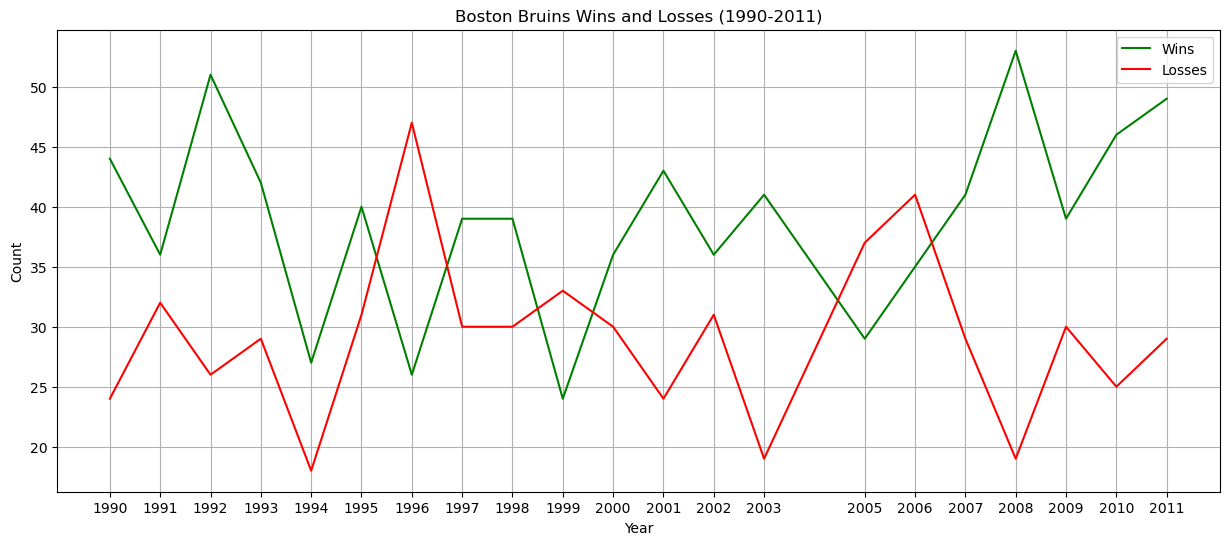

In [53]:
plt.figure(figsize=(15, 6))
plt.plot(dataBoston['Years'],dataBoston['Wins'],label='Wins',color='green')
plt.plot(dataBoston['Years'],dataBoston['Losses'],label='Losses',color='red')
plt.title("Boston Bruins Wins and Losses (1990-2011)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(dataBoston['Years'])
plt.legend()
plt.grid()
plt.show()